<a href="https://colab.research.google.com/github/heyoo807/TIL/blob/master/0715~0716TIL_%EC%87%BC%ED%95%91%EB%AA%B0_%EA%B3%A0%EA%B0%9D%EC%A3%BC%EB%AC%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. 고객 주문 데이터 파악**

### **1-1. 데이터 셋**
* 온라인 리테일 사이트의 2010/12 ~ 2011/12까지의 주문 기록 데이터
* 약 500,000건의 데이터

In [1]:
import numpy as np
import pandas as pd

In [2]:
retail = pd.read_csv('OnlineRetail.csv')

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100247 entries, 0 to 100246
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    100247 non-null  object 
 1   StockCode    100247 non-null  object 
 2   Description  99948 non-null   object 
 3   Quantity     100247 non-null  int64  
 4   InvoiceDate  100246 non-null  object 
 5   UnitPrice    100246 non-null  float64
 6   CustomerID   65312 non-null   float64
 7   Country      100246 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


In [4]:
retail.columns
# InvoiceNo : 주문번호
# StockCode : 아이템 아이디
# Description : 상품 설명
# Quantity : 상품 주문 수량
# InvoiceDate : 주문 시간
# UnitPrice : 상품 가격
# CustomerID : 고객 아이디
# Country : 고객 거주 지역(국가)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
retail.isnull().sum() # 각 필드당 null이 몇개 있는지 확인

InvoiceNo          0
StockCode          0
Description      299
Quantity           0
InvoiceDate        1
UnitPrice          1
CustomerID     34935
Country            1
dtype: int64

In [7]:
type(pd.notnull(retail['CustomerID'])) # pandas.core.series.Series

pandas.core.series.Series

In [8]:
# 비회원이 없는 df
retail[pd.notnull(retail['CustomerID'])] #pd.notnull(retail['CustomerID']) 시리즈로 불린 인덱싱

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
100222,544811,22625,RED KITCHEN SCALES,6,2/23/2011 15:53,8.50,12471.0,Germany
100223,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2/23/2011 15:53,3.75,12471.0,Germany
100224,544811,22741,FUNKY DIVA PEN,48,2/23/2011 15:53,0.85,12471.0,Germany
100225,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2/23/2011 15:53,4.95,12471.0,Germany


In [9]:
type(retail['CustomerID'].notnull()) # pandas.core.series.Series

pandas.core.series.Series

In [10]:
retail[retail['CustomerID'].notnull()] # retail['CustomerID'].notnull() 시리즈로 불린 인덱싱


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
100222,544811,22625,RED KITCHEN SCALES,6,2/23/2011 15:53,8.50,12471.0,Germany
100223,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2/23/2011 15:53,3.75,12471.0,Germany
100224,544811,22741,FUNKY DIVA PEN,48,2/23/2011 15:53,0.85,12471.0,Germany
100225,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2/23/2011 15:53,4.95,12471.0,Germany


In [11]:
retail = retail[pd.notnull(retail['CustomerID'])] # 비회원 제거

In [12]:
len(retail) # 406829

65312

In [13]:
# retail[retail['Quantity'] > 0 and retail['UnitPrice'] > 0] # ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [14]:
# retail[retail['Quantity'] > 0 & retail['UnitPrice'] > 0] # TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [15]:
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]

In [16]:
len(retail) # 397884

63534

In [17]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63534 entries, 0 to 100226
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    63534 non-null  object 
 1   StockCode    63534 non-null  object 
 2   Description  63534 non-null  object 
 3   Quantity     63534 non-null  int64  
 4   InvoiceDate  63534 non-null  object 
 5   UnitPrice    63534 non-null  float64
 6   CustomerID   63534 non-null  float64
 7   Country      63534 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.4+ MB


In [18]:
# (파생변수) 고객의 총 지출비용(CheckoutPrice) = 수량 * 가격
# retail['CheckoutPrice'] 
retail['CheckOutPrice'] = retail['Quantity'] * retail['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckOutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
100222,544811,22625,RED KITCHEN SCALES,6,2/23/2011 15:53,8.50,12471.0,Germany,51.00
100223,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2/23/2011 15:53,3.75,12471.0,Germany,45.00
100224,544811,22741,FUNKY DIVA PEN,48,2/23/2011 15:53,0.85,12471.0,Germany,40.80
100225,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2/23/2011 15:53,4.95,12471.0,Germany,29.70


In [20]:
retail.to_csv('OnlineRetailClean.csv') # 전처리 기초 버전 df를 OnlineRetailClean이름의 csv파일로 저장

In [21]:
dtypes = {'UnitPrice': np.float32, 'CustomerID':np.int32, 'Quantity':np.int32} # 특정 필드들의 dtypes을 딕셔너리 자료구조를 이용해 값 변경

In [22]:
retail = pd.read_csv('OnlineRetailClean.csv', dtype = dtypes) # dtype에 dtypes대입 옵션

In [23]:
retail.info() # memory usage 27.3MB -> 25.8MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63534 entries, 0 to 63533
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     63534 non-null  int64  
 1   InvoiceNo      63534 non-null  int64  
 2   StockCode      63534 non-null  object 
 3   Description    63534 non-null  object 
 4   Quantity       63534 non-null  int32  
 5   InvoiceDate    63534 non-null  object 
 6   UnitPrice      63534 non-null  float32
 7   CustomerID     63534 non-null  int32  
 8   Country        63534 non-null  object 
 9   CheckOutPrice  63534 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(2), object(4)
memory usage: 4.1+ MB


### **1-2. 날짜 타입 데이터 변환**
* 문자열로 데이터를 로딩하는 것보다 datetime 타입으로 로딩하는 것이 날짜 분석 및 계산에 용이

In [24]:
# 전체 매출
# retail['CheckOutPrice'].sum()
total_revenue = retail['CheckOutPrice'].sum()
total_revenue

1523487.93

In [25]:
# 국가별 매출
print(type(retail.groupby('Country').sum())) # pandas.core.frame.DataFrame
print(type(retail.groupby('Country')['CheckOutPrice'])) # pandas.core.groupby.generic.SeriesGroupBy
print(type(retail.groupby('Country').sum()['CheckOutPrice'])) # <class 'pandas.core.series.Series'>
print(type(retail.groupby('Country')['CheckOutPrice'].sum())) # <class 'pandas.core.series.Series'>

rev_by_countries = retail.groupby('Country').sum()['CheckOutPrice'].sort_values()
rev_by_countries


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Country
Israel                      779.10
Austria                     795.56
United Arab Emirates        889.24
Iceland                    1187.18
Poland                     1465.43
Lithuania                  1661.06
Denmark                    1680.72
Lebanon                    1693.88
Finland                    1781.82
Singapore                  2053.07
Greece                     2661.24
Channel Islands            2823.82
Italy                      3470.01
Norway                     4418.02
Belgium                    4851.33
Switzerland                6229.48
Cyprus                     6472.56
Portugal                   7469.33
Sweden                     7830.12
Japan                     13485.88
Spain                     14044.32
Australia                 24333.43
France                    33870.52
Germany                   40432.63
EIRE                      40844.59
Netherlands               58407.55
United Kingdom          1237856.04
Name: CheckOutPrice, dtype: float64

In [26]:
rev_by_countries.index

Index(['Israel', 'Austria', 'United Arab Emirates', 'Iceland', 'Poland',
       'Lithuania', 'Denmark', 'Lebanon', 'Finland', 'Singapore', 'Greece',
       'Channel Islands', 'Italy', 'Norway', 'Belgium', 'Switzerland',
       'Cyprus', 'Portugal', 'Sweden', 'Japan', 'Spain', 'Australia', 'France',
       'Germany', 'EIRE', 'Netherlands', 'United Kingdom'],
      dtype='object', name='Country')

In [27]:
retail.index

RangeIndex(start=0, stop=63534, step=1)

[Text(0, 0, 'Israel'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

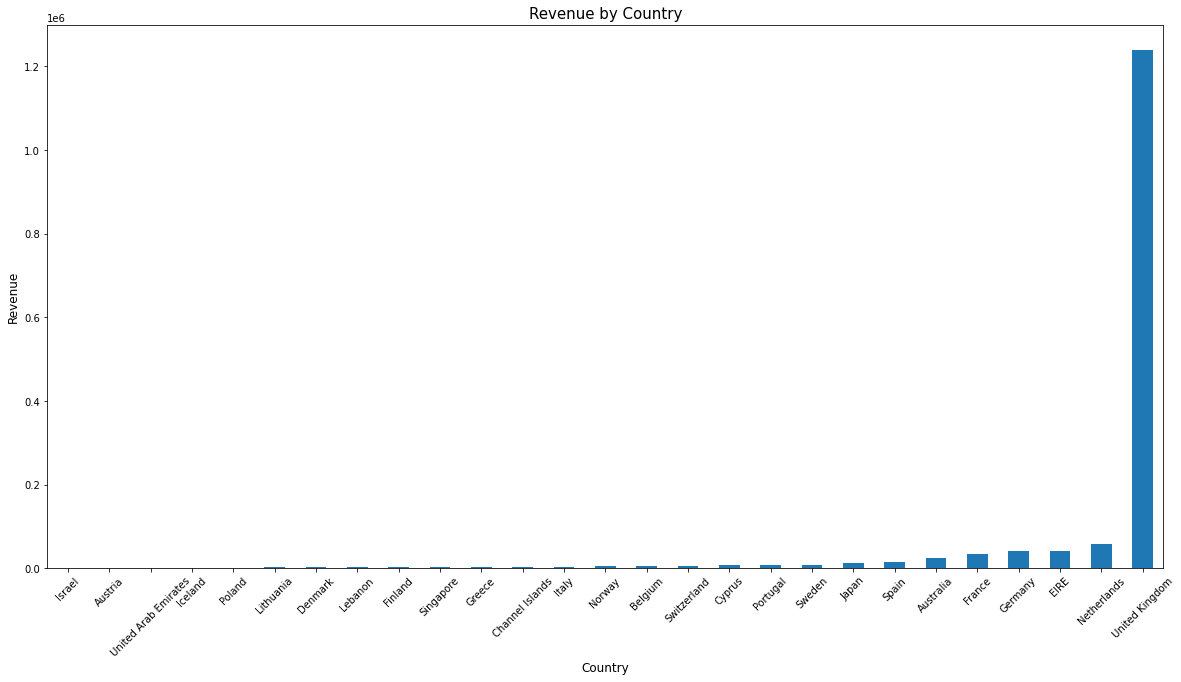

In [28]:
plot = rev_by_countries.plot(kind = 'bar', figsize = (20, 10))
plot.set_xlabel('Country', fontsize = 12)
plot.set_ylabel('Revenue', fontsize = 12)
plot.set_title('Revenue by Country', fontsize = 15)
plot.set_xticklabels(labels = rev_by_countries.index, rotation = 45)

In [29]:
retail = retail.drop('Unnamed: 0', axis = 1)
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckOutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
63529,544811,22625,RED KITCHEN SCALES,6,2/23/2011 15:53,8.50,12471,Germany,51.00
63530,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2/23/2011 15:53,3.75,12471,Germany,45.00
63531,544811,22741,FUNKY DIVA PEN,48,2/23/2011 15:53,0.85,12471,Germany,40.80
63532,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2/23/2011 15:53,4.95,12471,Germany,29.70


In [30]:
# 각 나라의 총매출이 전체 매출에서 차지하는 비율
rev_by_countries / total_revenue

Country
Israel                  0.000511
Austria                 0.000522
United Arab Emirates    0.000584
Iceland                 0.000779
Poland                  0.000962
Lithuania               0.001090
Denmark                 0.001103
Lebanon                 0.001112
Finland                 0.001170
Singapore               0.001348
Greece                  0.001747
Channel Islands         0.001854
Italy                   0.002278
Norway                  0.002900
Belgium                 0.003184
Switzerland             0.004089
Cyprus                  0.004249
Portugal                0.004903
Sweden                  0.005140
Japan                   0.008852
Spain                   0.009219
Australia               0.015972
France                  0.022232
Germany                 0.026540
EIRE                    0.026810
Netherlands             0.038338
United Kingdom          0.812515
Name: CheckOutPrice, dtype: float64

## **2. 월별 매출 구하기**

In [31]:
retail['InvoiceDate'].sort_values(ascending = False)

53037      2/9/2011 9:10
53038      2/9/2011 9:10
53039      2/9/2011 9:10
53040      2/9/2011 9:10
53041      2/9/2011 9:10
              ...       
31539    1/10/2011 10:32
31540    1/10/2011 10:32
31541    1/10/2011 10:32
31542    1/10/2011 10:32
31527    1/10/2011 10:32
Name: InvoiceDate, Length: 63534, dtype: object

In [32]:
retail.info() #  4   InvoiceDate    397884 non-null  object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63534 entries, 0 to 63533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      63534 non-null  int64  
 1   StockCode      63534 non-null  object 
 2   Description    63534 non-null  object 
 3   Quantity       63534 non-null  int32  
 4   InvoiceDate    63534 non-null  object 
 5   UnitPrice      63534 non-null  float32
 6   CustomerID     63534 non-null  int32  
 7   Country        63534 non-null  object 
 8   CheckOutPrice  63534 non-null  float64
dtypes: float32(1), float64(1), int32(2), int64(1), object(4)
memory usage: 3.6+ MB


In [33]:
# infer_datetime_format = True : 날짜 시간 포맷을 추정해서 파싱
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format = True)

In [34]:
retail.info() #  4   InvoiceDate    397884 non-null  datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63534 entries, 0 to 63533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      63534 non-null  int64         
 1   StockCode      63534 non-null  object        
 2   Description    63534 non-null  object        
 3   Quantity       63534 non-null  int32         
 4   InvoiceDate    63534 non-null  datetime64[ns]
 5   UnitPrice      63534 non-null  float32       
 6   CustomerID     63534 non-null  int32         
 7   Country        63534 non-null  object        
 8   CheckOutPrice  63534 non-null  float64       
dtypes: datetime64[ns](1), float32(1), float64(1), int32(2), int64(1), object(3)
memory usage: 3.6+ MB


In [35]:
print(retail['InvoiceDate'][0].month)

12


In [36]:
def extract_month(date): # 2011-12-09 12:50:00
  month = str(date.month) # 12, 1
  if date.month < 10:
    month = '0' + month
  return str(date.year) + month # 201112, 201101

In [37]:
retail.set_index('InvoiceDate') # 첫 필드를 InvoiceDate로 설정

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CheckOutPrice
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-02-23 15:53:00,544811,22625,RED KITCHEN SCALES,6,8.50,12471,Germany,51.00
2011-02-23 15:53:00,544811,22728,ALARM CLOCK BAKELIKE PINK,12,3.75,12471,Germany,45.00
2011-02-23 15:53:00,544811,22741,FUNKY DIVA PEN,48,0.85,12471,Germany,40.80


In [38]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckOutPrice']  # groupby() 파라미터로 함수를 받을 수 있는지
rev_by_month

InvoiceDate
201012    572713.89
201101    569445.04
201102    381329.00
Name: CheckOutPrice, dtype: float64

In [39]:
def plot_bar(df, xlabel, ylabel, title, figsize = (10, 10), rotation = 45):
  plot = df.plot(kind = 'bar', figsize = figsize)
  plot.set_xlabel(xlabel, fontsize = 12)
  plot.set_ylabel(ylabel, fontsize = 12)
  plot.set_title(title, fontsize = 15)
  plot.set_xticklabels(labels = df.index, rotation = rotation)

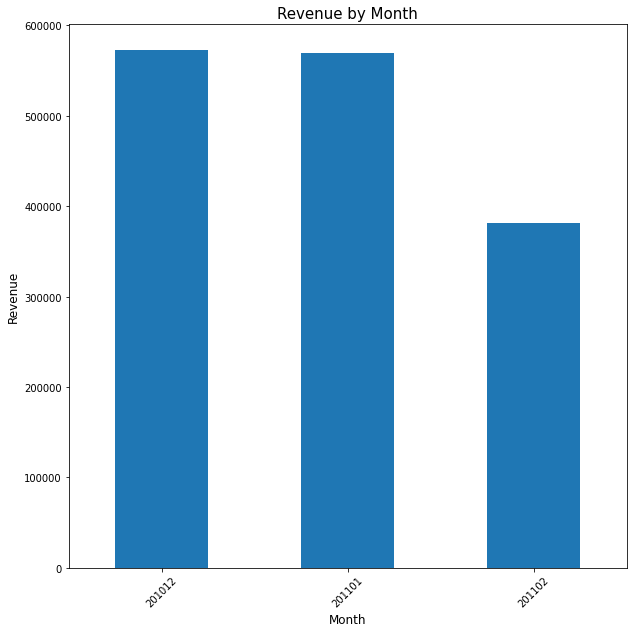

In [40]:
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

## **3. 요일별 매출 구하기   ***

In [41]:
rev_by_day = retail.set_index('InvoiceDate').groupby(lambda date: date.dayofweek).sum()['CheckOutPrice']
rev_by_day


InvoiceDate
0    226095.64
1    390661.58
2    276507.77
3    281218.04
4    233678.45
6    115326.45
Name: CheckOutPrice, dtype: float64

In [42]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat' ,'Sun'])

In [43]:
print(type(rev_by_day))
print(rev_by_day.index) # Int64Index([0, 1, 2, 3, 4, 6], dtype='int64', name='InvoiceDate')
rev_by_day.index = DAY_OF_WEEK[rev_by_day.index]
print(rev_by_day.index) # Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun'], dtype='object')

<class 'pandas.core.series.Series'>
Int64Index([0, 1, 2, 3, 4, 6], dtype='int64', name='InvoiceDate')
Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun'], dtype='object')


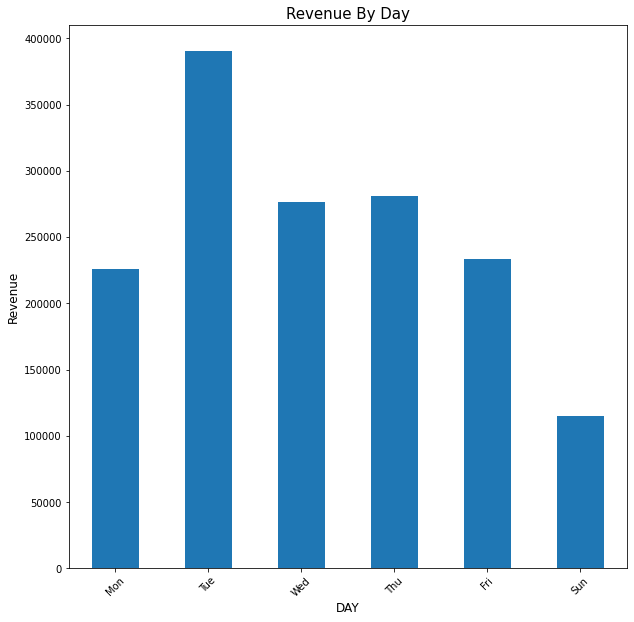

In [44]:
plot_bar(rev_by_day, 'DAY', 'Revenue', 'Revenue By Day')

## **4. 시간대별 매출 구하기**


In [45]:
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date: date.hour).sum()['CheckOutPrice']
rev_by_hour

InvoiceDate
7       1743.50
8      35377.77
9     133293.43
10    272622.26
11    190963.88
12    259844.67
13    182474.27
14    156537.12
15    163534.73
16     88716.59
17     25931.98
18      6903.64
19      5243.45
20       300.64
Name: CheckOutPrice, dtype: float64

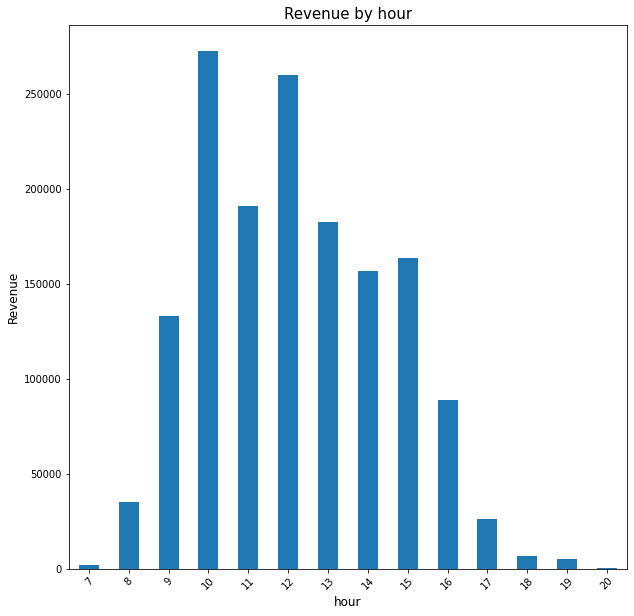

In [46]:
plot_bar(rev_by_hour, 'hour', 'Revenue', 'Revenue by hour')

5. 매출로부터 Insight
* 전체 매출의 약 825가 UK에서 발생
* 11년도 가장 많은 매출이 발생한 달이 11월
* 매출은 꾸준히 급상승(12월 데이터는 모두 미포함)
* 일주일 중 목요일까지는 성장세, 그 이후로는 하락세
* 6시에 주문이 시작, 오후 12시까지는 성장세, 3시 이후로는 급락

## **6. 제품별 metrics**

In [52]:
# Top 10 판매제품(Quantity)
top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending = False)
top_selling

StockCode
23166     74215
85123A    10714
84077     10036
21212      8468
85099B     7246
          ...  
20700         1
35004P        1
90129F        1
90133         1
85031B        1
Name: Quantity, Length: 2747, dtype: int32

In [53]:
#Top 10  매출 제품(CheckOutPrice)
top_revenue = retail.groupby('StockCode').sum()['CheckOutPrice'].sort_values(ascending = False)
top_revenue

StockCode
23166     77183.60
22423     37132.20
85123A    28962.00
79321     14703.81
21623     13949.13
            ...   
10123C        0.65
71215         0.42
79149B        0.42
79151B        0.42
17174         0.42
Name: CheckOutPrice, Length: 2747, dtype: float64

## **7. 우수 고객**

In [54]:
# 구매 횟수 기준(Quantity)
vip = retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending = False)
vip

CustomerID
12748    711
17841    697
15311    696
14606    694
14911    505
        ... 
15510      1
15562      1
15753      1
18017      1
12346      1
Name: Quantity, Length: 1602, dtype: int64

In [60]:
retail.groupby('CustomerID').sum()

,InvoiceNo,Quantity,UnitPrice,CheckOutPrice
CustomerID,,,,
12346,541431,74215,1.040000,77183.60
12347,32391279,634,162.759995,1187.18
12348,12420394,1855,91.610001,1120.24
12350,9231629,197,65.300003,334.40
12352,8162340,98,68.349998,296.50
...,...,...,...,...
18257,8707366,124,68.299995,363.80
18259,3764691,116,22.100000,376.30
18260,19986479,487,113.110001,787.77


In [62]:
# 지불 금액 기준 (CheckOutPrice)
vvip = retail.groupby('CustomerID').sum()['CheckOutPrice'].sort_values(ascending = False)
vvip

CustomerID
12346    77183.60
14646    57866.02
18102    38370.09
14156    25752.25
15749    22998.40
           ...   
15823       15.00
16882        9.90
16692        8.50
16738        3.75
16554        0.85
Name: CheckOutPrice, Length: 1602, dtype: float64

## **8. 사용자 기준으로 최초 구매한 열 연산하기**

In [64]:
from datetime import datetime

def get_month_as_datetime(date): # 2011-12-09 12:50:00
  return datetime(date.year, date.month, 1) # 2011-12-01
retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckOutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [78]:
month_group = retail.groupby('CustomerID')['Month']
# transform() : 데이터 프레임에 그룹단위 통계를 집계
retail['MonthStarted'] = month_group.transform(np.min)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckOutPrice,Month,MonthStarted
63529,544811,22625,RED KITCHEN SCALES,6,2011-02-23 15:53:00,8.50,12471,Germany,51.0,2011-02-01,2010-12-01
63530,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2011-02-23 15:53:00,3.75,12471,Germany,45.0,2011-02-01,2010-12-01
63531,544811,22741,FUNKY DIVA PEN,48,2011-02-23 15:53:00,0.85,12471,Germany,40.8,2011-02-01,2010-12-01
63532,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-02-23 15:53:00,4.95,12471,Germany,29.7,2011-02-01,2010-12-01
63533,544811,POST,POSTAGE,3,2011-02-23 15:53:00,18.00,12471,Germany,54.0,2011-02-01,2010-12-01


In [79]:
# 각 구매가 최초 구매로 부터 얼마의 월이 지났는지 연산
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year) * 12 + \
  (retail['Month'].dt.month - retail['MonthStarted'].dt.month)

retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckOutPrice,Month,MonthStarted,MonthPassed
63529,544811,22625,RED KITCHEN SCALES,6,2011-02-23 15:53:00,8.50,12471,Germany,51.0,2011-02-01,2010-12-01,2
63530,544811,22728,ALARM CLOCK BAKELIKE PINK,12,2011-02-23 15:53:00,3.75,12471,Germany,45.0,2011-02-01,2010-12-01,2
63531,544811,22741,FUNKY DIVA PEN,48,2011-02-23 15:53:00,0.85,12471,Germany,40.8,2011-02-01,2010-12-01,2
63532,544811,22720,SET OF 3 CAKE TINS PANTRY DESIGN,6,2011-02-23 15:53:00,4.95,12471,Germany,29.7,2011-02-01,2010-12-01,2
63533,544811,POST,POSTAGE,3,2011-02-23 15:53:00,18.00,12471,Germany,54.0,2011-02-01,2010-12-01,2
